In [1]:

import numpy as np
import pandas as pd
import time
import os
from glob import glob
import datetime as dt
import dask.dataframe as dd
import matplotlib.pyplot as plt
#import graphviz

In [2]:
from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=1, memory_limit='1.5GB')
client

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP st

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 1,Total memory: 1.40 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61208,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 1
Started: Just now,Total memory: 1.40 GiB
Comm: tcp://127.0.0.1:61213,Total threads: 1
Dashboard: http://127.0.0.1:61214/status,Memory: 1.40 GiB
Nanny: tcp://127.0.0.1:61211,


In [3]:
%%time
# df = dd.read_csv("winequality-red[1].csv", sep = ";", dtype = {'free sulfur dioxide' : 'float64','total sulfur dioxide':'float64'})

df = dd.read_csv("green_tripdata_2016-07.csv", dtype={'total_amount': 'float64'})

CPU times: user 0 ns, sys: 46.9 ms, total: 46.9 ms
Wall time: 76.7 ms


In [4]:
df.tail()

distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


VendorID lpep_pickup_datetime  \
1 2016-07-31 23:00:27  2016-07-31 23:16:09                    N   
  2016-07-31 23:00:31  2016-07-31 23:08:18                    N   
  2016-07-31 23:59:32  2016-08-01 00:06:55                    Y   
  2016-07-31 23:43:56  2016-07-31 23:50:33                    Y   
  2016-07-31 23:22:17  2016-07-31 23:32:51                    Y   

                       lpep_dropoff_datetime  store_and_fwd_flag  RatecodeID  \
1 2016-07-31 23:00:27                      1                  41         244   
  2016-07-31 23:00:31                      1                 166         116   
  2016-07-31 23:59:32                      1                  17          61   
  2016-07-31 23:43:56                      1                  61          61   
  2016-07-31 23:22:17                      1                  17          61   

                       PULocationID  DOLocationID  passenger_count  \
1 2016-07-31 23:00:27             1           4.4             15.5   
  2016-07-31 23:00:31             1           1.8              8.5   
  2016-07-31 23:59:32             1           1.2              7.0   
  2016-07-31 23:43:56             1           1.1              6.5   
  2016-07-31 23:22:17             1           1.5              8.5   

                       trip_distance  fare_amount  extra  mta_tax  tip_amount  \
1 2016-07-31 23:00:27            0.5          0.5    3.0      0.0         NaN   
  2016-07-31 23:00:31            0.5          0.5    3.0      0.0         NaN   
  2016-07-31 23:59:32            0.5          0.5    0.0      0.0         NaN   
  2016-07-31 23:43:56            0.5          0.5    0.0      0.0         NaN   
  2016-07-31 23:22:17            0.5          0.5    0.0      0.0         NaN   

                       tolls_amount  ehail_fee  improvement_surcharge  \
1 2016-07-31 23:00:27           0.3       19.8                      1   
  2016-07-31 23:00:31           0.3       12.8                      1   
  2016-07-31 23:59:32           0.3        8.3                      1   
  2016-07-31 23:43:56           0.3        7.8                      2   
  2016-07-31 23:22:17           0.3        9.8                      2   

                       total_amount  payment_type  trip_type  
1 2016-07-31 23:00:27           1.0           NaN        NaN  
  2016-07-31 23:00:31           1.0           NaN        NaN  
  2016-07-31 23:59:32           1.0           NaN        NaN  
  2016-07-31 23:43:56           1.0           NaN        NaN  
  2016-07-31 23:22:17           1.0           NaN        NaN

In [5]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [6]:
df.shape

(Delayed('int-03e909e1-e9a6-4369-a5c8-2acdd2322568'), 19)

In [7]:
df.compute()


distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available
distributed.comm.tcp - WARNING - Could not set timeout on TCP stream: [Errno 92] Protocol not available


VendorID lpep_pickup_datetime  \
2 2016-07-01 00:01:22  2016-07-01 00:38:57                    N   
  2016-07-01 00:00:37  2016-07-01 00:09:40                    N   
  2016-07-01 00:00:04  2016-07-02 00:00:00                    N   
  2016-07-01 00:01:41  2016-07-01 00:14:21                    N   
  2016-07-01 00:05:37  2016-07-01 00:13:50                    N   
...                                    ...                  ...   
1 2016-07-31 23:00:27  2016-07-31 23:16:09                    N   
  2016-07-31 23:00:31  2016-07-31 23:08:18                    N   
  2016-07-31 23:59:32  2016-08-01 00:06:55                    Y   
  2016-07-31 23:43:56  2016-07-31 23:50:33                    Y   
  2016-07-31 23:22:17  2016-07-31 23:32:51                    Y   

                       lpep_dropoff_datetime  store_and_fwd_flag  RatecodeID  \
2 2016-07-01 00:01:22                      1                   7          41   
  2016-07-01 00:00:37                      1                 226         157   
  2016-07-01 00:00:04                      1                 255          17   
  2016-07-01 00:01:41                      1                 256          80   
  2016-07-01 00:05:37                      1                  97          17   
...                                      ...                 ...         ...   
1 2016-07-31 23:00:27                      1                  41         244   
  2016-07-31 23:00:31                      1                 166         116   
  2016-07-31 23:59:32                      1                  17          61   
  2016-07-31 23:43:56                      1                  61          61   
  2016-07-31 23:22:17                      1                  17          61   

                       PULocationID  DOLocationID  passenger_count  \
2 2016-07-01 00:01:22             1          7.14             28.0   
  2016-07-01 00:00:37             1          2.17              9.0   
  2016-07-01 00:00:04             1          1.70              8.0   
  2016-07-01 00:01:41             1          3.47             13.0   
  2016-07-01 00:05:37             1          1.89              8.5   
...                             ...           ...              ...   
1 2016-07-31 23:00:27             1          4.40             15.5   
  2016-07-31 23:00:31             1          1.80              8.5   
  2016-07-31 23:59:32             1          1.20              7.0   
  2016-07-31 23:43:56             1          1.10              6.5   
  2016-07-31 23:22:17             1          1.50              8.5   

                       trip_distance  fare_amount  extra  mta_tax  tip_amount  \
2 2016-07-01 00:01:22            0.0          0.5   5.76      0.0         NaN   
  2016-07-01 00:00:37            0.5          0.5   0.00      0.0         NaN   
  2016-07-01 00:00:04            0.5          0.5   1.86      0.0         NaN   
  2016-07-01 00:01:41            0.5          0.5   4.29      0.0         NaN   
  2016-07-01 00:05:37            0.5          0.5   1.96      0.0         NaN   
...                              ...          ...    ...      ...         ...   
1 2016-07-31 23:00:27            0.5          0.5   3.00      0.0         NaN   
  2016-07-31 23:00:31            0.5          0.5   3.00      0.0         NaN   
  2016-07-31 23:59:32            0.5          0.5   0.00      0.0         NaN   
  2016-07-31 23:43:56            0.5          0.5   0.00      0.0         NaN   
  2016-07-31 23:22:17            0.5          0.5   0.00      0.0         NaN   

                       tolls_amount  ehail_fee  improvement_surcharge  \
2 2016-07-01 00:01:22           0.3      34.56                      1   
  2016-07-01 00:00:37           0.3      10.30                      2   
  2016-07-01 00:00:04           0.3      11.16                      1   
  2016-07-01 00:01:41           0.3      18.59                      1   
  2016-07-01 00:05:37           0.3      11.76                      1   
...             

In [8]:
df.describe()

,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
npartitions=1,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
missing_values = df.isnull().sum()
missing_values.compute()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount               1332510
tolls_amount                   0
ehail_fee                      0
improvement_surcharge          0
total_amount                  16
payment_type             1332510
trip_type                1332510
dtype: int64

In [10]:
df.compute().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1332510 entries, (2, '2016-07-01 00:01:22') to (1, '2016-07-31 23:22:17')
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1332510 non-null  object 
 1   lpep_pickup_datetime   1332510 non-null  object 
 2   lpep_dropoff_datetime  1332510 non-null  int64  
 3   store_and_fwd_flag     1332510 non-null  int64  
 4   RatecodeID             1332510 non-null  int64  
 5   PULocationID           1332510 non-null  int64  
 6   DOLocationID           1332510 non-null  float64
 7   passenger_count        1332510 non-null  float64
 8   trip_distance          1332510 non-null  float64
 9   fare_amount            1332510 non-null  float64
 10  extra                  1332510 non-null  float64
 11  mta_tax                1332510 non-null  float64
 12  tip_amount             0 non-null        float64
 13  tolls_amount           13325

In [11]:
df.compute().describe()

,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,1.332510e+06,1.332510e+06,1.332510e+06,1.332510e+06,1.332510e+06,1.332510e+06,1.332510e+06,1.332510e+06,1.332510e+06,1.332510e+06,0.0,1.332510e+06,1.332510e+06,1.332510e+06,1.332494e+06,0.0,0.0
mean,1.094868e+00,1.154151e+02,1.290219e+02,1.363392e+00,2.906561e+00,1.244441e+01,3.459485e-01,4.864084e-01,1.271873e+00,1.218432e-01,NaN,2.918979e-01,1.499490e+01,1.513181e+00,1.021765e+00,NaN,NaN
std,6.838234e-01,7.789910e+01,7.756717e+01,1.026918e+00,3.023490e+00,1.087011e+01,3.737303e-01,8.684494e-02,2.564724e+00,1.296288e+00,NaN,5.200040e-02,1.235233e+01,5.247821e-01,1.459160e-01,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-4.500000e+00,-5.000000e-01,-5.160000e+00,-3.000000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00,NaN,NaN
25%,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,1.070000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00,NaN,NaN
50%,1.000000e+00,9.200000e+01,1.290000e+02,1.000000e+00,1.910000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.131000e+01,2.000000e+00,1.000000e+00,NaN,NaN
75%,1.000000e+00,1.810000e+02,1.930000e+02,1.000000e+00,3.640000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.780000e+01,2.000000e+00,1.000000e+00,NaN,NaN
max,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,1.487200e+02,1.903500e+03,4.500000e+00,5.000000e-01,2.508000e+02,9.000000e+02,NaN,3.000000e-01,1.905300e+03,5.000000e+00,2.000000e+00,NaN,NaN


In [12]:
print('number of rows', len(df.index))
print('number of columns', len(df.columns))

number of rows 1332510
number of columns 19


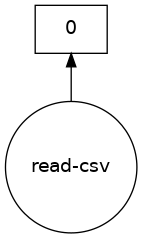

tornado.application - ERROR - Uncaught exception GET /status/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:8787', method='GET', uri='/status/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/abhishek/miniconda3/lib/python3.9/site-packages/tornado/websocket.py", line 954, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/abhishek/miniconda3/lib/python3.9/site-packages/tornado/web.py", line 3173, in wrapper
    return method(self, *args, **kwargs)
  File "/home/abhishek/miniconda3/lib/python3.9/site-packages/bokeh/server/views/ws.py", line 149, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.


In [22]:
import graphviz
df.visualize()

In [14]:
import matplotlib.pyplot as plt

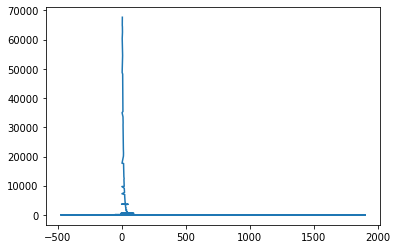

In [19]:
df['passenger_count'].value_counts().compute().plot(kind = 'line')
plt.show()

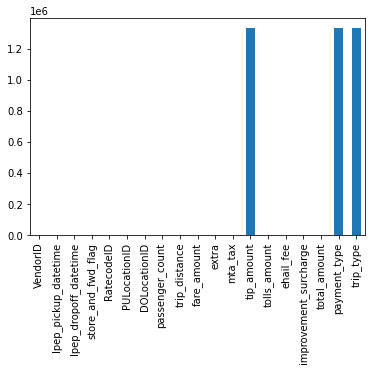

In [20]:
missing_values.compute().plot(kind = 'bar')
plt.show()